## Verificación de circuitos.
### 1. Verifica que los circuitos de los protocolos cuánticos se construyan correctamente.

Imports.

In [1]:
import src.game_builder as gb
from src.protocols.strategies import PureStrategy, MixedStrategy, RotationsBasedStrategy

from utils.network import NetworkGenerator, NetworkDrawer
import utils.quantum as qu

import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
import random

Configuración de semilla.

In [2]:
random_seed = 404
np.random.seed(random_seed)
random.seed(random_seed)

Configuración de red de prueba.

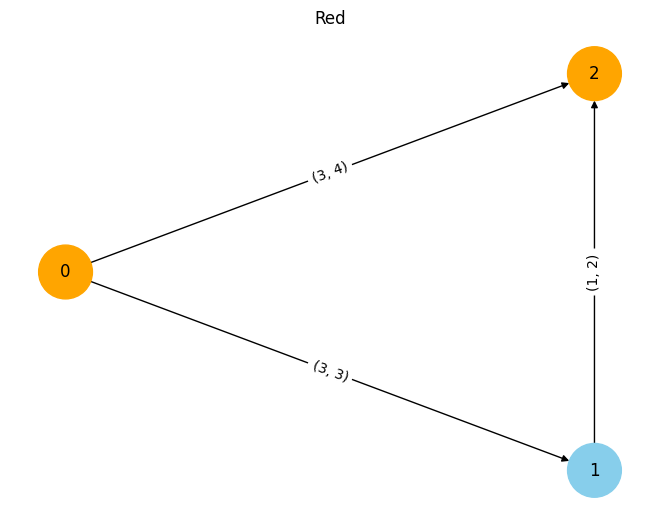

In [3]:
networkGenerator = NetworkGenerator()
drawer = NetworkDrawer()

N = networkGenerator.generate_random_with_paths(2) 
drawer.draw(N, "latency")

n_paths = len(N.get_all_possible_paths())
n_packets = 3

MWP

(<Figure size 1400x400 with 1 Axes>, <Axes: >)


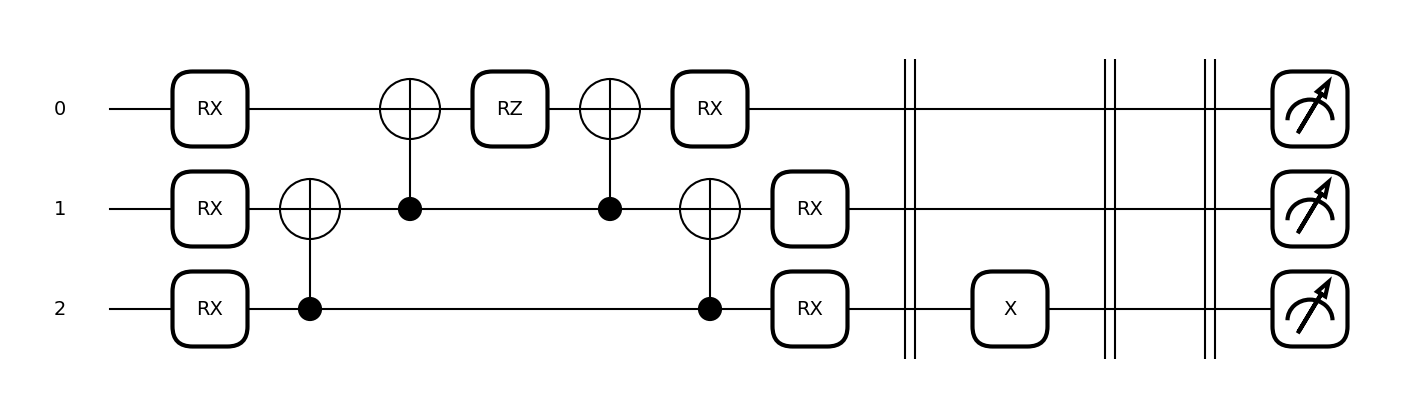

In [4]:
gb.mwp().draw(N, n_packets, [PureStrategy(3, n_paths) for _ in range(n_packets)])

MWM

(<Figure size 1300x400 with 1 Axes>, <Axes: >)


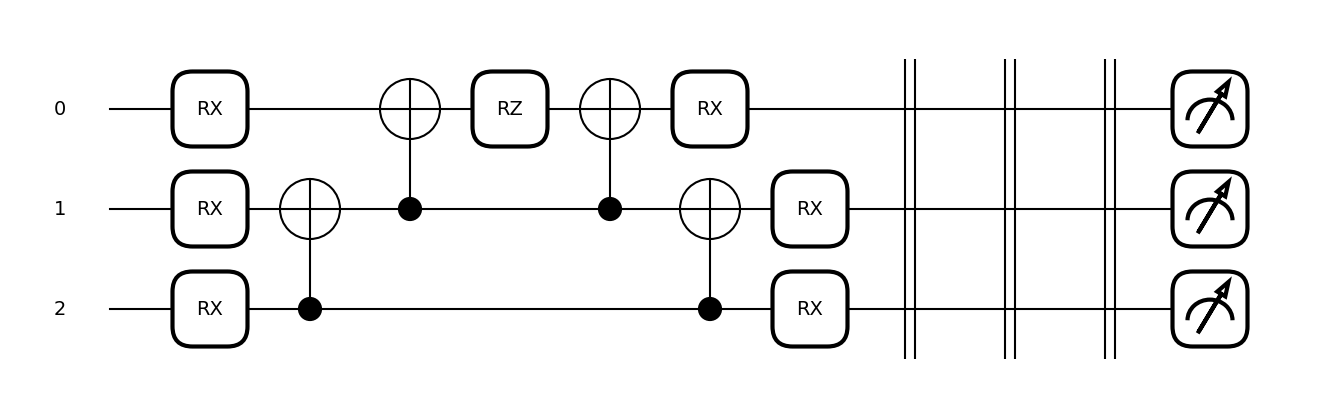

In [5]:
gb.mwm().draw(N, n_packets, [MixedStrategy(0.1, 1, n_paths) for _ in range(n_packets)])

EWL en las $3$ variantes (número de parámetros).

(<Figure size 2100x400 with 1 Axes>, <Axes: >)


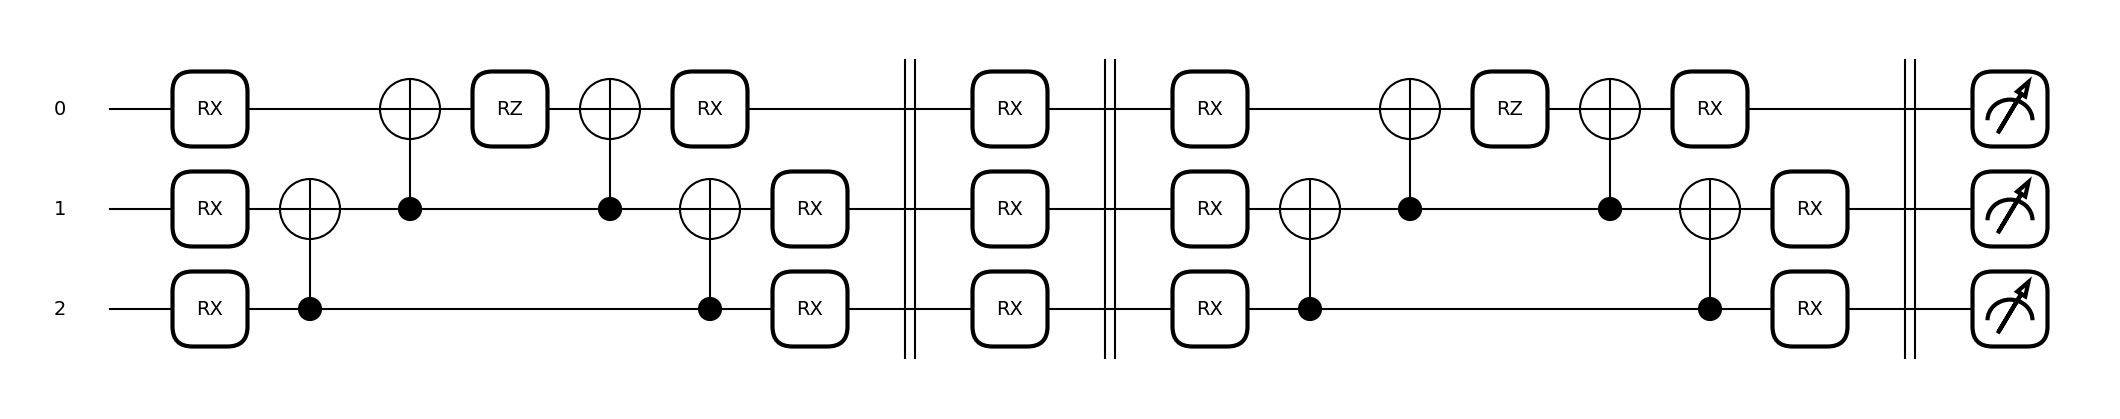

In [6]:
gb.ewl().draw(N, n_packets, [RotationsBasedStrategy(0.1, 0.5, 1, 1) for _ in range(n_packets)])

(<Figure size 2100x400 with 1 Axes>, <Axes: >)


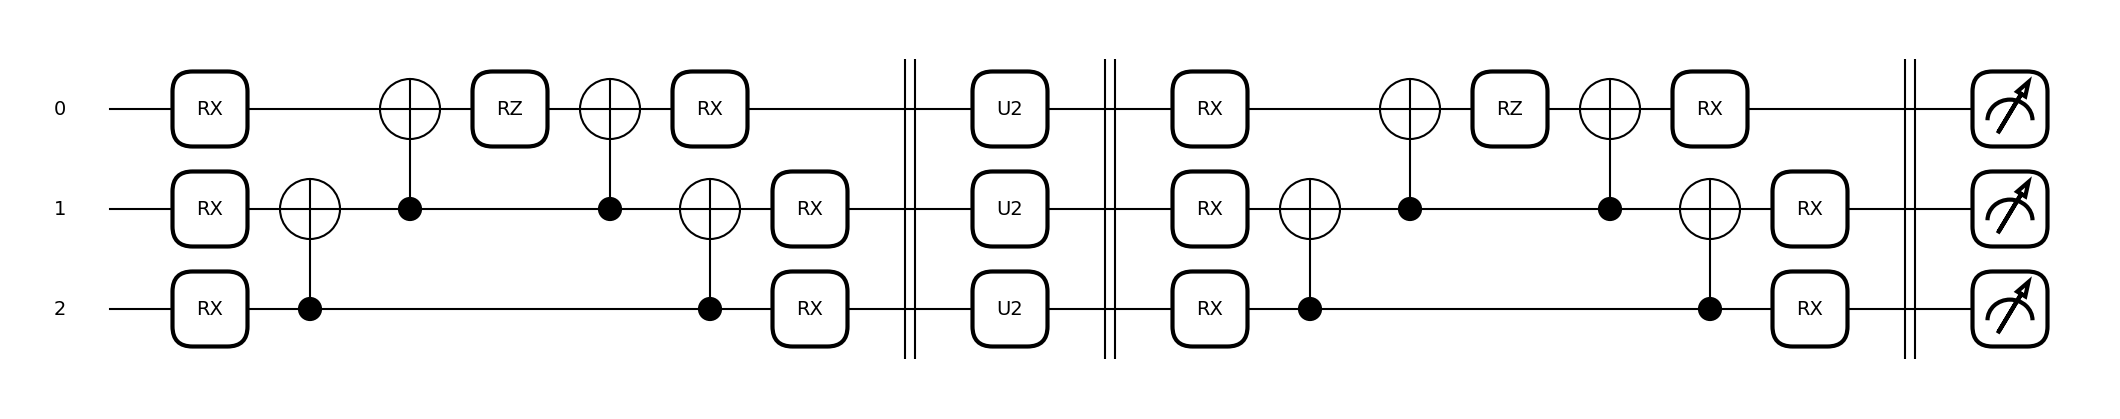

In [7]:
gb.ewl().draw(N, n_packets, [RotationsBasedStrategy(0.1, 0.5, 1, 2) for _ in range(n_packets)])

(<Figure size 2100x400 with 1 Axes>, <Axes: >)


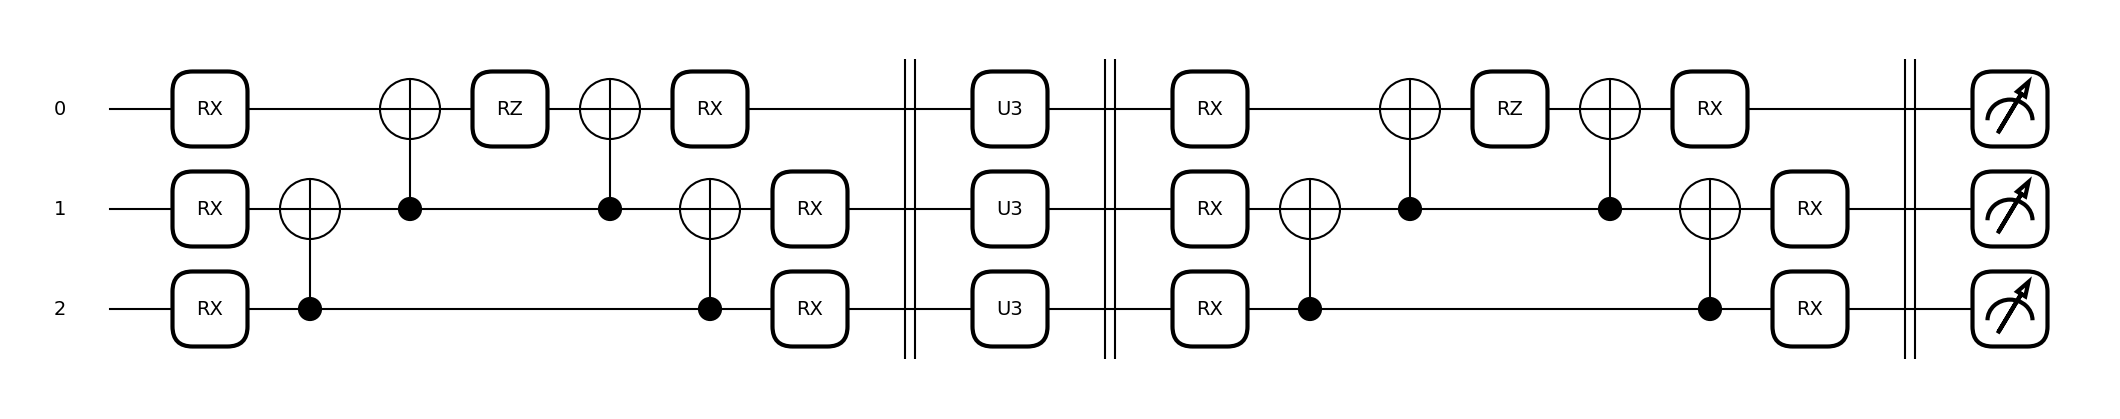

In [8]:
gb.ewl().draw(N, n_packets, [RotationsBasedStrategy(0.1, 0.5, 1, 3) for _ in range(n_packets)])

In [9]:
### 2. Verifica que el operador J obtenga el resultado correcto.

Configuración de experimento.

In [10]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def J_circuit(gamma):
    qu.J(gamma, wires=range(n_qubits))
    return qml.state()

def get_J_state(gamma):
    state = J_circuit(gamma)
    state_rounded = np.round(state, 2)
    print(state_rounded)

Pruebas para $\gamma \in \{0,\frac{\pi}{4}, \frac{\pi}{2}\}$.

In [11]:
get_J_state(0)

[ 1.+0.j  0.-0.j  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j]


In [12]:
get_J_state(np.pi/4)

[ 0.92+0.j   -0.  +0.j   -0.  +0.j    0.  +0.j   -0.  +0.j    0.  +0.j
  0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j
 -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  -0.38j]


In [13]:
get_J_state(np.pi/2)

[ 0.71+0.j   -0.  +0.j   -0.  -0.j   -0.  +0.j   -0.  -0.j   -0.  +0.j
 -0.  +0.j   -0.  -0.j   -0.  +0.j    0.  -0.j    0.  -0.j   -0.  +0.j
  0.  -0.j   -0.  +0.j   -0.  +0.j    0.  -0.71j]
